In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline 

$$y = X^3 + 100 +  \epsilon$$
We will be solving polynomial regression for this equation

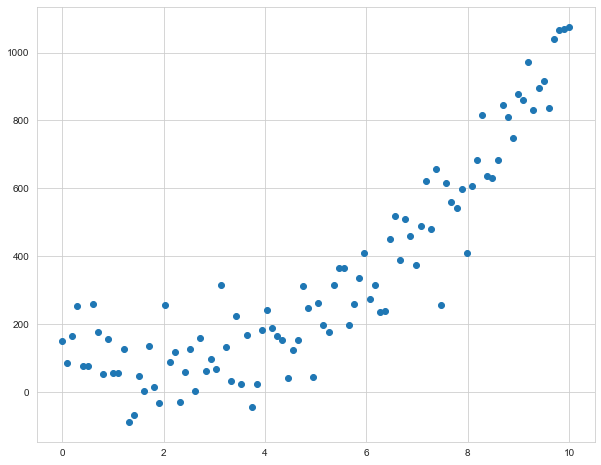

In [6]:
# making random data 
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X**3 + rng + 100

plt.figure(figsize=(10,8));
plt.scatter(X,y);

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

R2 Score is:  0.7643394574930141


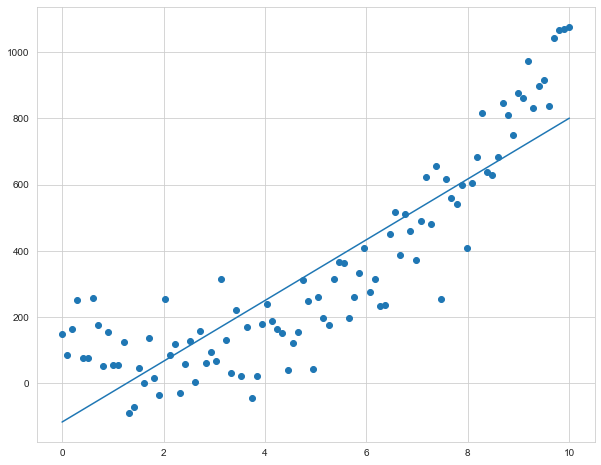

In [8]:
# defining model
lr = LinearRegression()

# fit the model 
lr.fit(X.reshape(-1,1), y)

# predict model 
model_pred = lr.predict(X.reshape(-1,1))

# Display the data with predicted line 
plt.figure(figsize=(10,8))
plt.scatter(X, y);
plt.plot(X, model_pred);

# getting r2 score 
r2 = r2_score(y, model_pred)
print("R2 Score is: ", r2)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# instantiating 2 degree polynomial features
poly_reg = PolynomialFeatures(degree= 2)
# fitting 2 degree transformation 
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

In [11]:
# Apply linear regression 
lr_2 = LinearRegression()
lr_2.fit(X_poly, y.reshape(-1, 1))
poly_pred = lr_2.predict(X_poly)

R2 Score for Polynomial:  0.9173858308909386


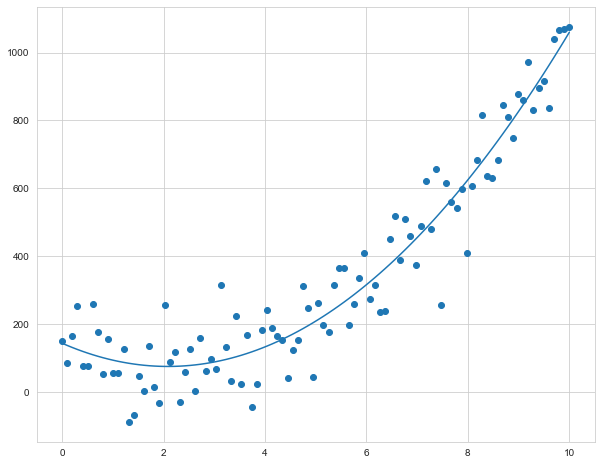

In [12]:
# Display data with line 
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, poly_pred);

r2_s = r2_score(y, poly_pred)
print("R2 Score for Polynomial: ", r2_s)

# Boston Housing Data 

In [14]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [16]:
df = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
# gettting correlation 
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [19]:
# taking DIS as features
X_boston = df['DIS'].values
# taking NOX as targets
y_boston = df['NOX'].values

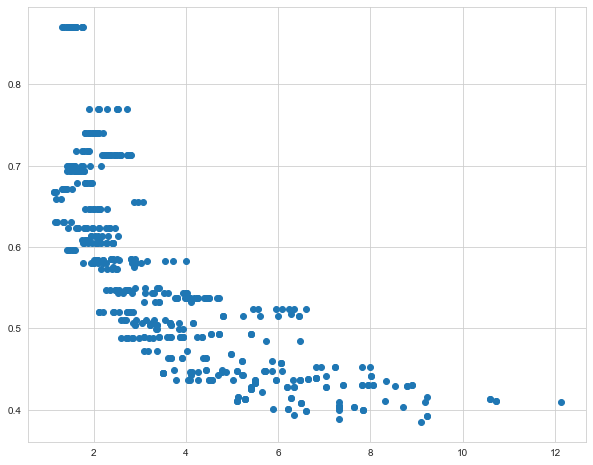

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(X_boston, y_boston);

#### Linear

R2 score is:  0.5917149670934201


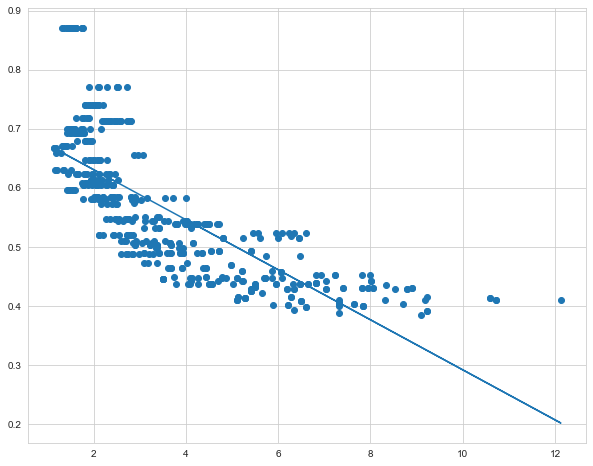

In [26]:
# Applying Linear Regression 
b_lr = LinearRegression()
b_lr.fit(X_boston.reshape(-1, 1), y_boston)
b_pred = b_lr.predict(X_boston.reshape(-1,1))

# Display line with scatter data
plt.figure(figsize=(10,8))
plt.scatter(X_boston, y_boston);
plt.plot(X_boston, b_pred);

# getting r2 score 
b_r2 = r2_score(y_boston, b_pred)
print("R2 score is: ", b_r2)

#### Quadratic 

In [27]:
# transforming data as 2 degree 
quad_reg = PolynomialFeatures(degree= 2)
X_quad = quad_reg.fit_transform(X_boston.reshape(-1, 1))

In [28]:
q_lr = LinearRegression()
q_lr.fit(X_quad, y_boston)

LinearRegression()

In [29]:
# rearrange 
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [32]:
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [33]:
# predict 
q_pred = q_lr.predict(quad_reg.fit_transform(X_fit.reshape(-1, 1)))
q_pred

array([0.7270008 , 0.63862769, 0.56452464, 0.50469165, 0.45912872,
       0.42783585, 0.41081304, 0.40806029, 0.41957761, 0.44536498,
       0.48542242])

R2 Score:  0.6998562064647851


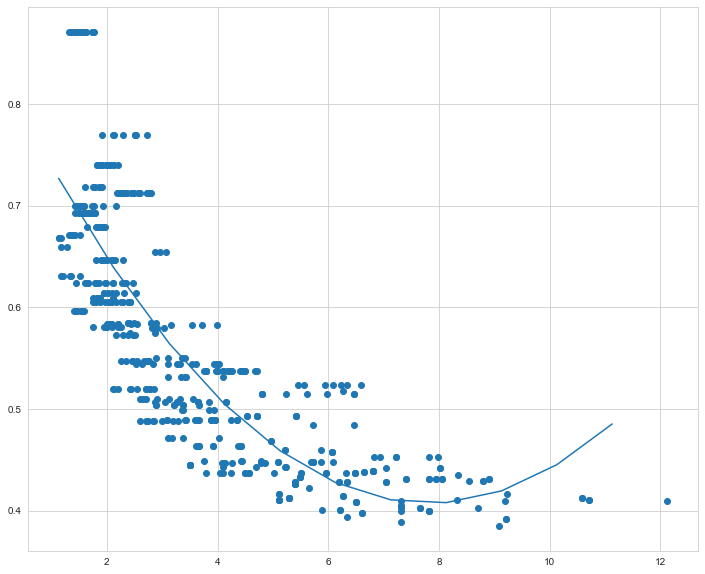

In [35]:
# display line alongwith data points 
plt.figure(figsize=(12,10))
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, q_pred);

# r2 score 
q_r2 = r2_score(y_boston, q_lr.predict(X_quad))
print("R2 Score: ", q_r2)

#### Cubic 

In [36]:
cubic_reg = PolynomialFeatures(degree= 3)
X_c = cubic_reg.fit_transform(X_boston.reshape(-1, 1))

In [37]:
c_lr = LinearRegression()
c_lr.fit(X_c, y_boston)

LinearRegression()

In [38]:
# rearrange 
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [40]:
# predict 
c_pred = c_lr.predict(cubic_reg.fit_transform(X_fit.reshape(-1, 1)))

R2 Score:  0.7147737433422647


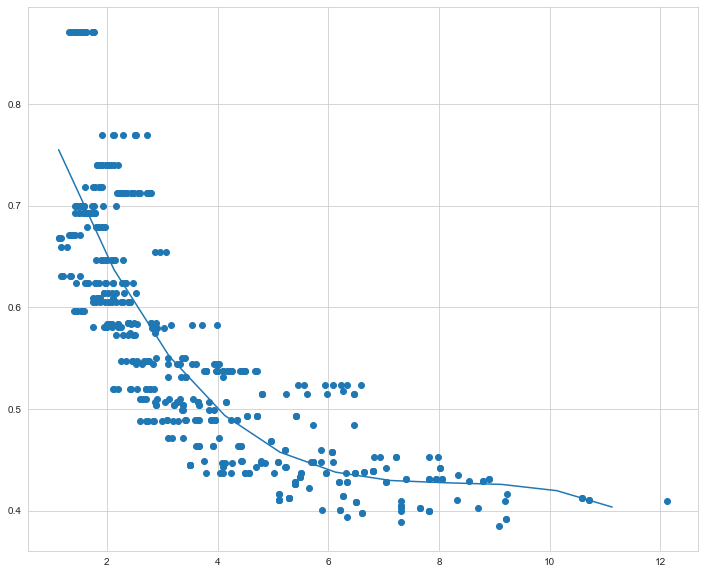

In [41]:
# display line alongwith data points 
plt.figure(figsize=(12,10))
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, c_pred);

# r2 score 
c_r2 = r2_score(y_boston, c_lr.predict(X_c))
print("R2 Score: ", c_r2)